## Radar Gage Intercomparisons

In [38]:
%matplotlib inline
%load_ext autoreload
%aimport common, rain
from rain import *
from common import get_index, choose_group, map_rain

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


ImportError: No module named common rain

**Philadelphia: **

In [ ]:
path = "C:/Users/Julia/Google Drive/PHILADELPHIA/"

rg = Rain(path=path, df_file="Philadelphia_raingage_1996_2015_NAN_filled_time_indexed.dat")
rad = Rain(path=path, name="Phila_gage_{YEAR}_fill.dat", year=range(2003,2015))

**St. Louis: **

In [102]:
path = 'C:/Users/Julia/Google Drive/STLOUIS/Version2/'

rg = Rain(path=path, name='StLouis_MSD_gage_{YEAR}.csv', year=range(2009, 2015), ngages=101, units='mm')
rad = Rain(path=path, name='StLouis_MSD_radar_{YEAR}.csv', year=range(2009, 2015), ngages=101, units='mm')
rg.ll_file = 'StLouis_MSD_lat_lon_{YEAR}.csv'.format(YEAR=rg.year)

rg.get_ll(cols=['lat','lon'])
rad.ll = rg.ll

### Let's Explore!

In [128]:
%autoreload

In [103]:
p = RadarGage(gage=rg, radar=rad)
p.get_nonan()
p.save_path = './output/StLouis/'

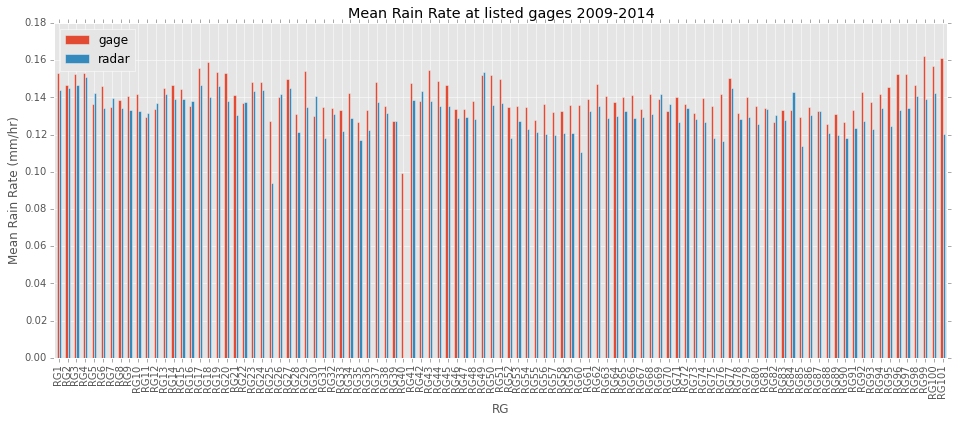

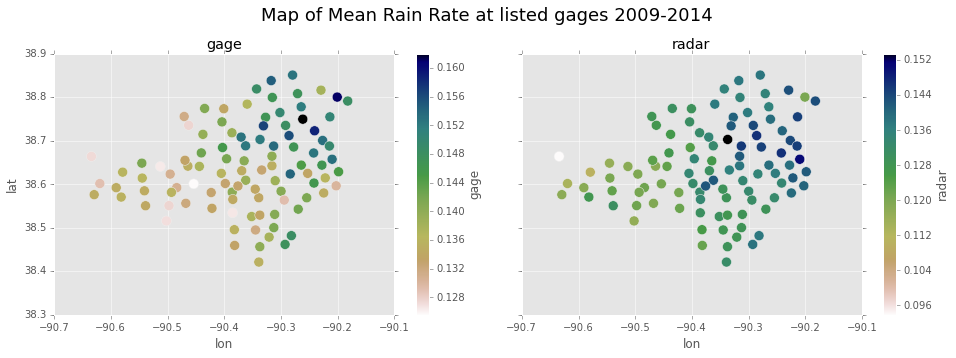

In [129]:
p.plot_rate(gage=list(get_index(p.rate, 'RG')[1]), map=True)

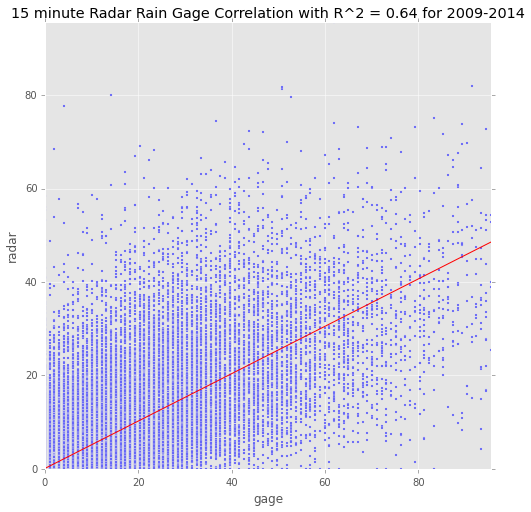

In [111]:
p.plot_correlation()

In [11]:
RMSE = (np.nanmean((p.df.gage-p.df.radar)**2))**.5
RMSE

0.87796031062183011

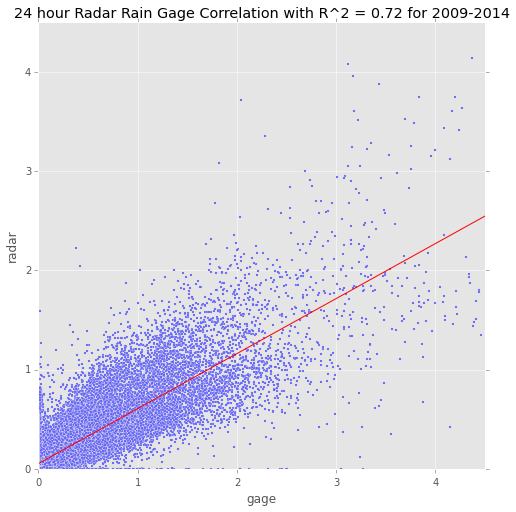

In [112]:
p.plot_correlation(time_step='24H', base=12)

In [113]:
RMSE = (np.nanmean((p.df.gage-p.df.radar)**2))**.5
RMSE

0.21531727741653434

### Comparison Plots of relative rain rates

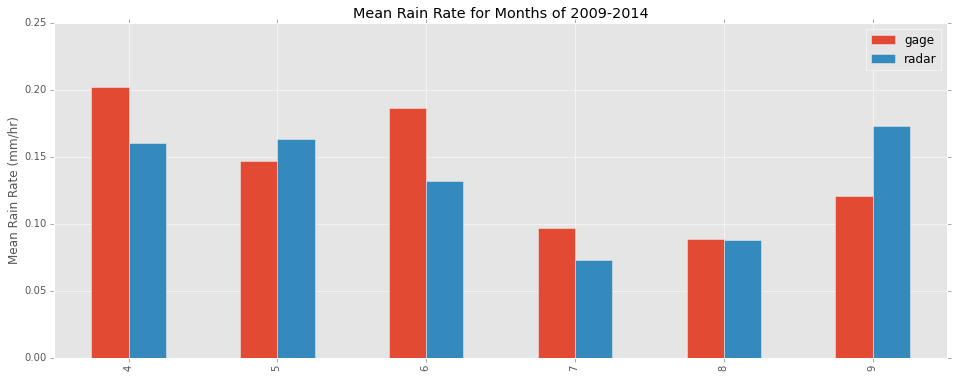

In [130]:
p.plot_rate(interval='seasonal')

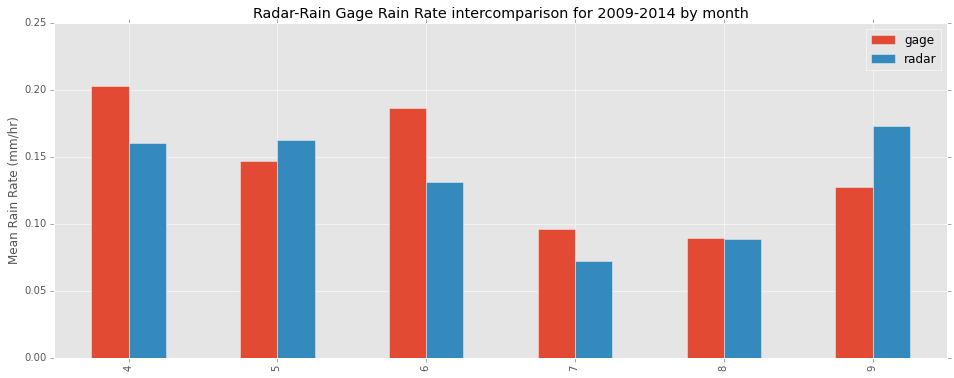

In [16]:
title = 'Radar-Rain Gage Rain Rate intercomparison for {YEAR} by month'.format(YEAR=p.year)

df = p.rate.groupby(p.rate.axes[1].month).mean().mean(axis=2)
df.plot(kind='bar', figsize=(16,6))
plt.ylabel('Mean Rain Rate (mm/hr)')
plt.title(title)
plt.savefig(p.save_path+title+'.jpg')
plt.show()

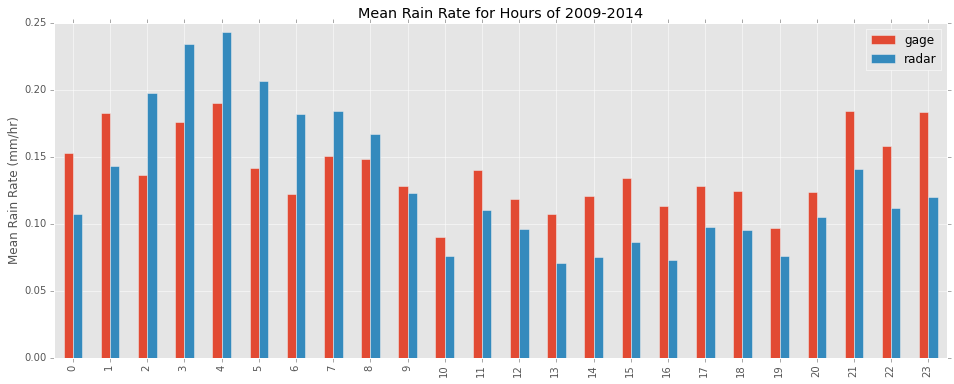

In [131]:
p.plot_rate(interval='diurnal')

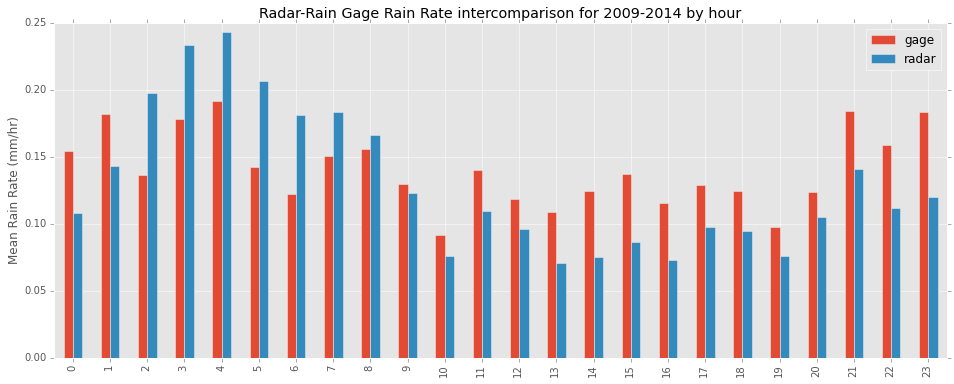

In [17]:
title = 'Radar-Rain Gage Rain Rate intercomparison for {YEAR} by hour'.format(YEAR=p.year)

df = p.rate.groupby(p.rate.axes[1].hour).mean().mean(axis=2)
df.plot(kind='bar', figsize=(16,6))
plt.ylabel('Mean Rain Rate (mm/hr)')
plt.title(title)
plt.savefig(p.save_path+title+'.jpg')
plt.show()

In [99]:
%timeit new_df = rg.rate >= rg.thresh; new_df[rg.rate.isnull()] = np.NaN

1 loops, best of 3: 2.22 s per loop


Choose you threshold carefully. You will notice that it makes a big difference in the results

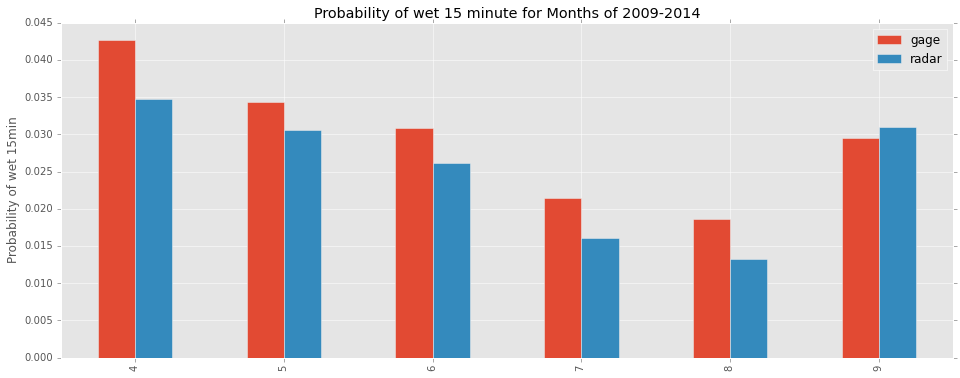

In [132]:
p.plot_prob_wet(interval='seasonal')

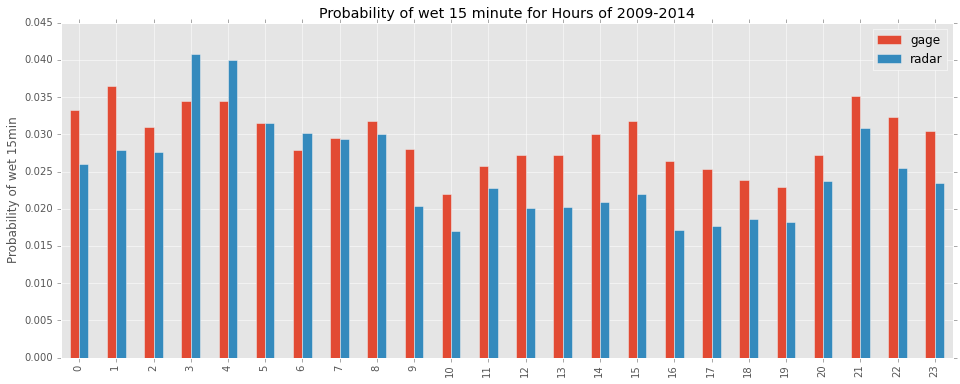

In [133]:
p.plot_prob_wet(interval='diurnal')

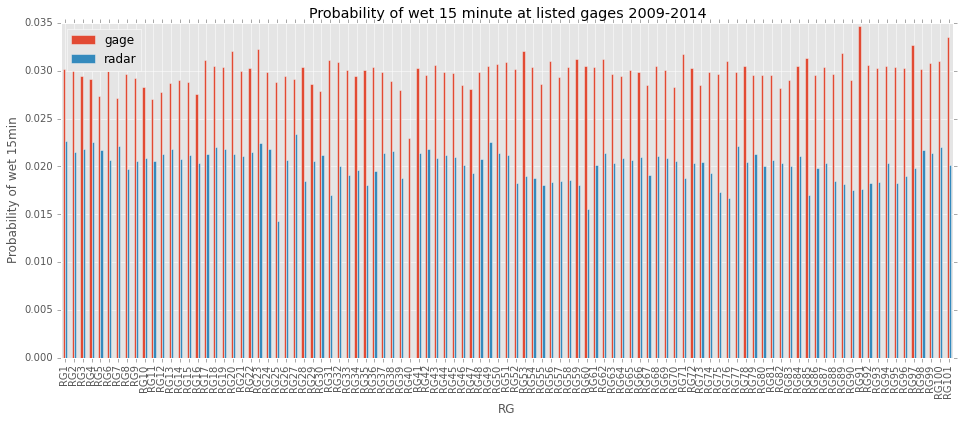

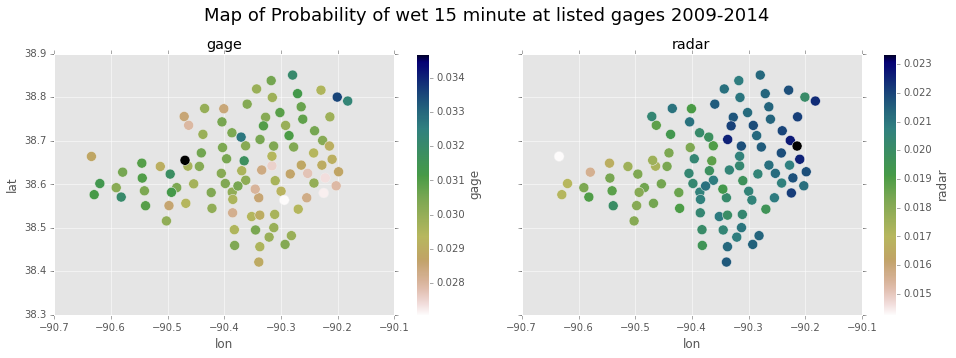

In [137]:
p.plot_prob_wet(gage=list(get_index(p.rate,'RG')[1]), map=True)

In [205]:
%autoreload

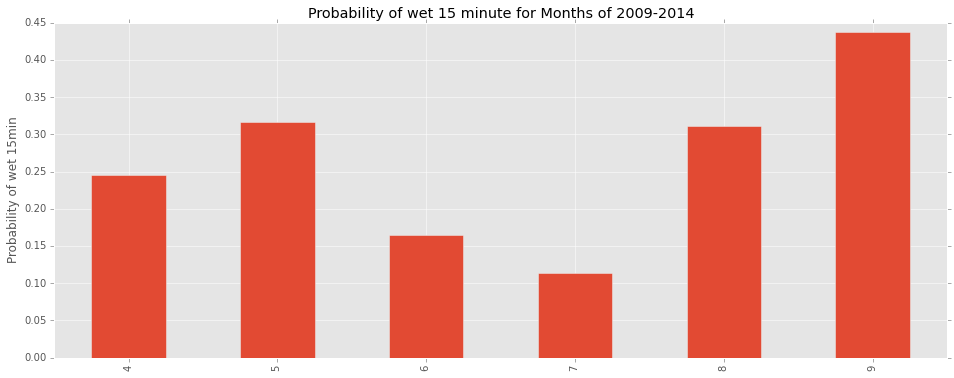

In [207]:
rad.plot_prob_wet(interval='seasonal')

In [204]:
type(rad.df.values()[0]) == np.float64

True

In [197]:
k.is()

False

### Plot the rainfall in space using shaded points

In [140]:
daily = p.rate.resample('24H', base=12, **get_resample_kwargs(p.rate))
day = p.ll.join(daily.to_frame().loc['2011-06-26 12:00:00'])
day = day[day.lat > -200]

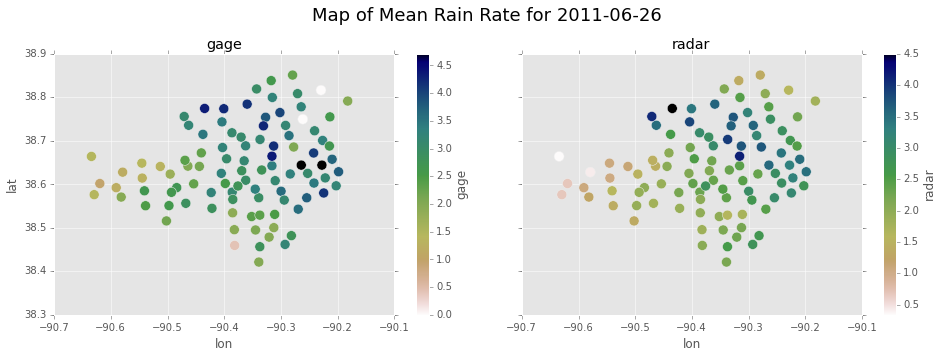

In [141]:
map_rain(day, p.save_path, 'Map of Mean Rain Rate for 2011-06-26')